<a href="https://colab.research.google.com/github/23117129/PYTORCH/blob/main/Dai_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
X = df.drop('tip', axis=1) # These are the features

y = df['tip'] # This target variable

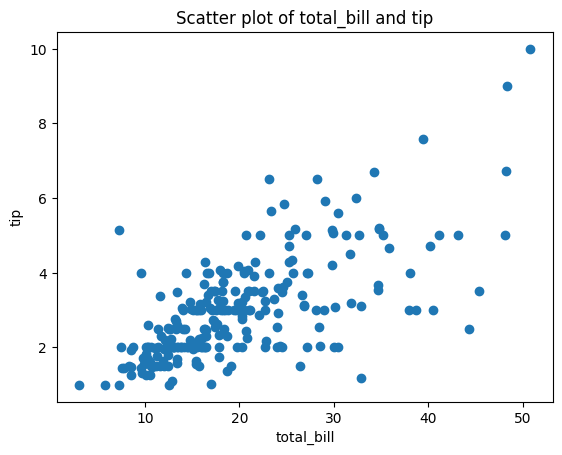

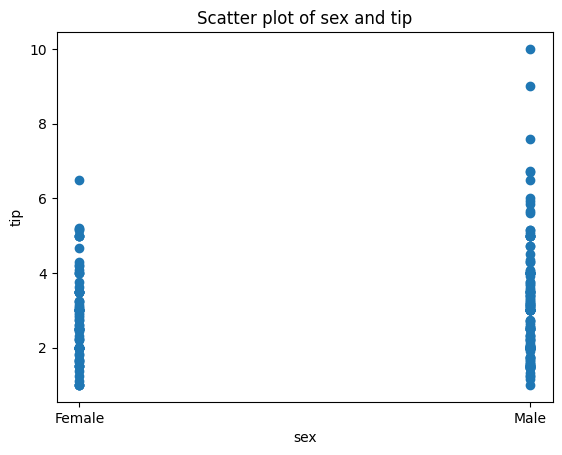

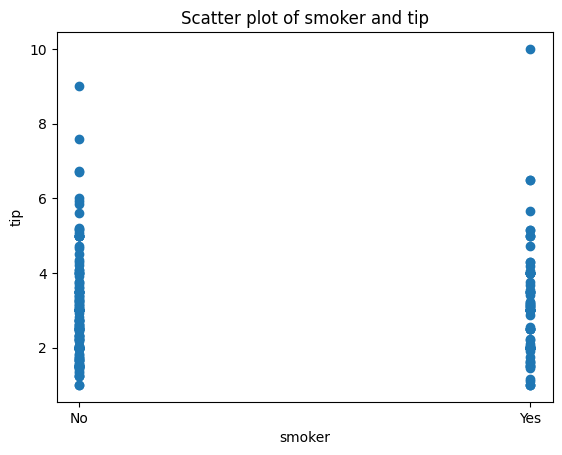

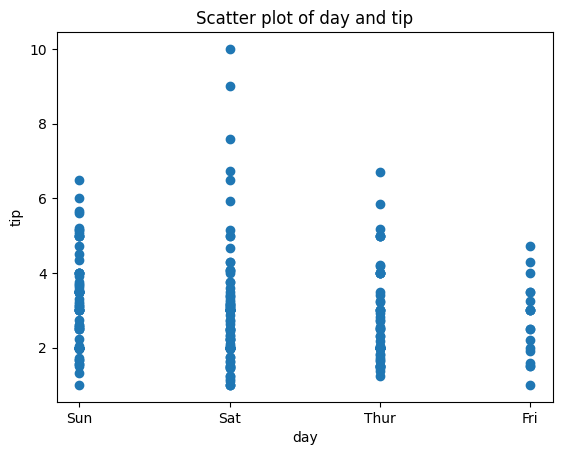

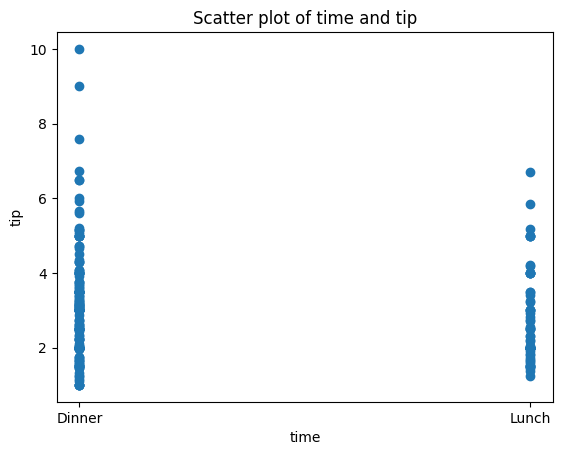

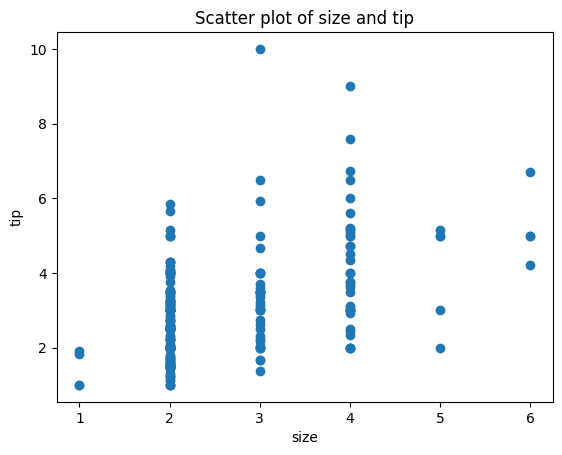

In [5]:
for i in X.columns:
  plt.scatter(X[i], y)
  plt.xlabel(i)
  plt.ylabel('tip')
  plt.title(f'Scatter plot of {i} and tip')
  plt.show()





# Relation among target and Featurers
1. We notice that tip amount is more if total bill is more
2. Male will give more tip than Female
3. No much differnce in smokers and non smokers for giving tip
4. On sunday tip amount is more and least on Friday
5. Dinner time is prefer for more tip


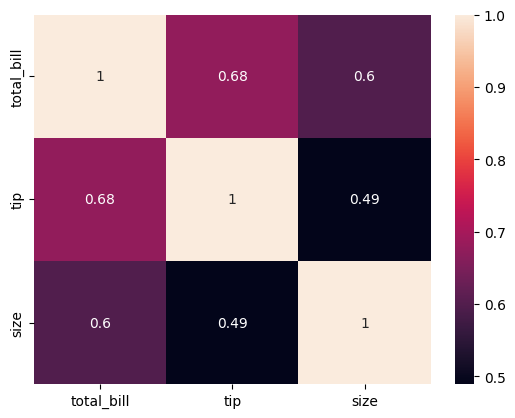

In [6]:
# Heat Map(correlation)
df_corr = df[['total_bill', 'tip' , 'size']]
sns.heatmap(df_corr.corr(), annot=True)
plt.show()


More correlation found among tip and total bill


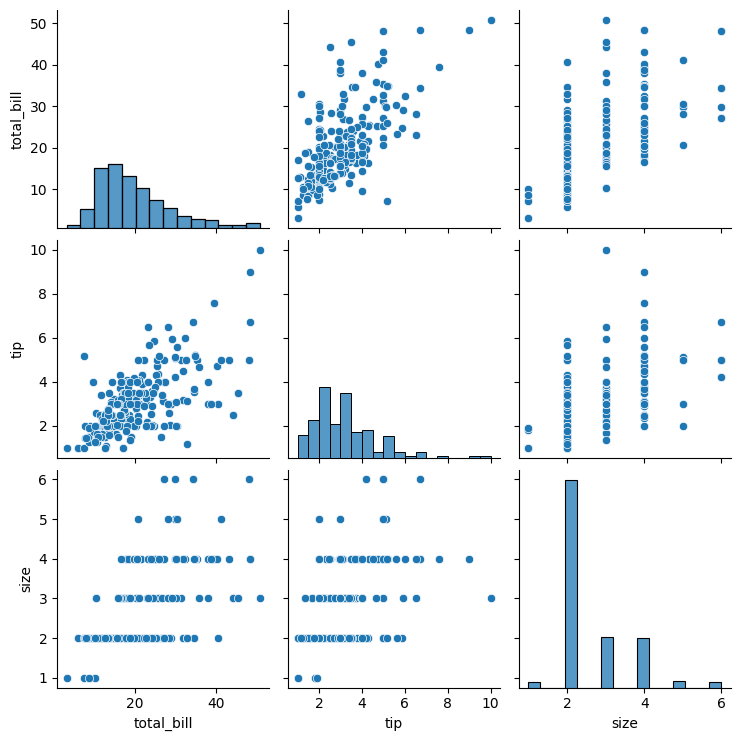

In [7]:
# We use the pairplot
sns.pairplot(df)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])

df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [9]:
X = df.drop('tip', axis=1) # These are the features

y = df['tip']

X

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4
...,...,...,...,...,...,...
239,29.03,1,0,1,0,3
240,27.18,0,1,1,0,2
241,22.67,1,1,1,0,2
242,17.82,1,0,1,0,2


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error




X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .25 , random_state =23)

R2_score 0.5066795931574803
MSE 0.9084829784718372
RMSE 0.953143734424057


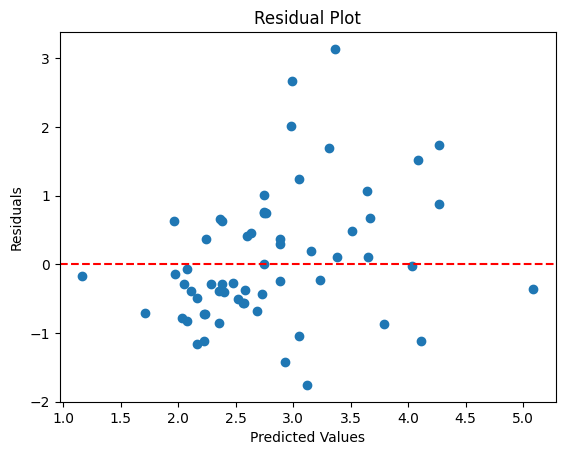

In [11]:
import numpy as np
LR = LinearRegression()
LR.fit(X_train , y_train)
y_pred =LR.predict(X_test)
print("R2_score" , r2_score(y_test , y_pred))
print("MSE" , mean_squared_error(y_test , y_pred))
print('RMSE' , np.sqrt(mean_squared_error(y_test , y_pred)))

# Residual Plot
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()




# Residual Plot is plot after the model prediction


In [12]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))

Ridge Regression R2: 0.5097699116382306


In [13]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))

Lasso Regression R2: 0.5259777491486488


In [14]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))

Decision Tree R2: 0.12939915217187692


In [15]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

Random Forest R2: 0.47245307966737504


In [16]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


print('R2_score' , r2_score(y_test, y_pred_svr))

R2_score 0.5075577776818163


In [17]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))

KNN Regression R2: 0.3355429976251788


Residuals of Rideg_reg
0.06962815891265398


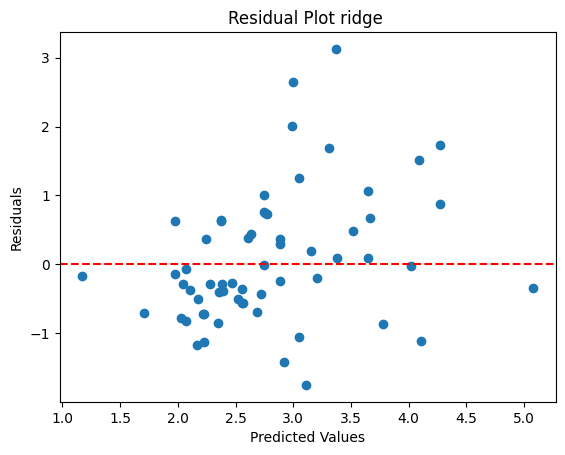


Residuals of Lasso_reg
0.0742230482473069


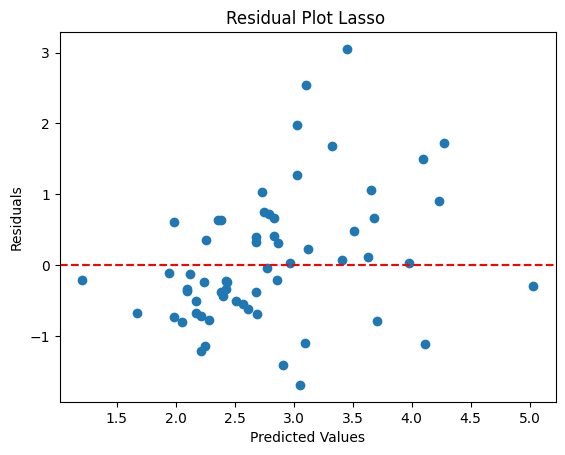

Residuals of Tree_reg
0.09655737704918033


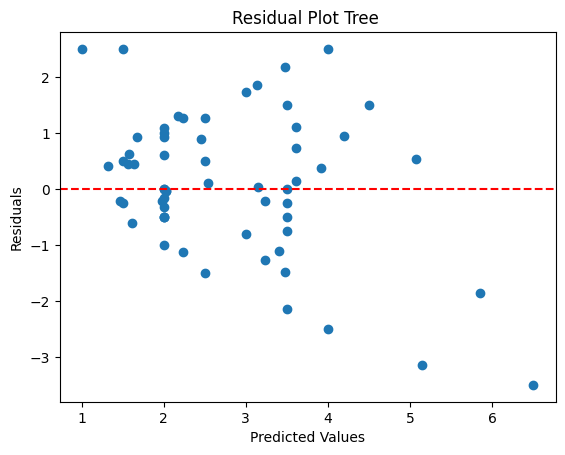

Residuals of Forest_reg
0.049503278688524624


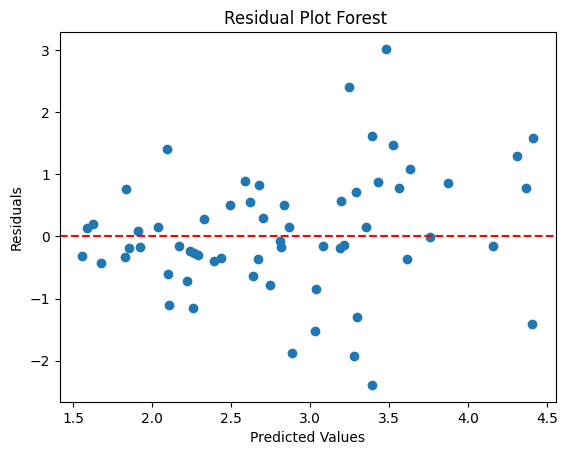

Residuals of SVR_reg
0.1919792426974899


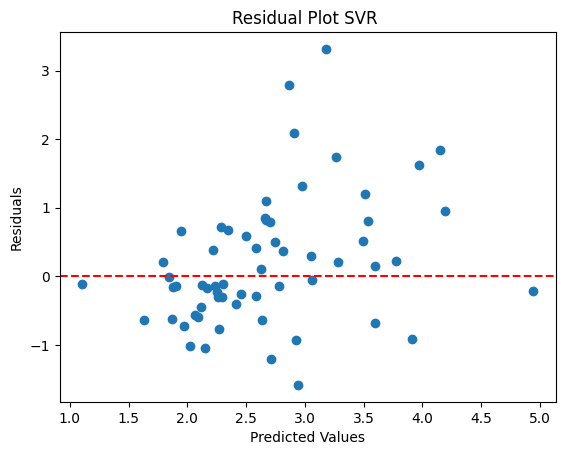

Residuals of KNN_reg
0.13180327868852457


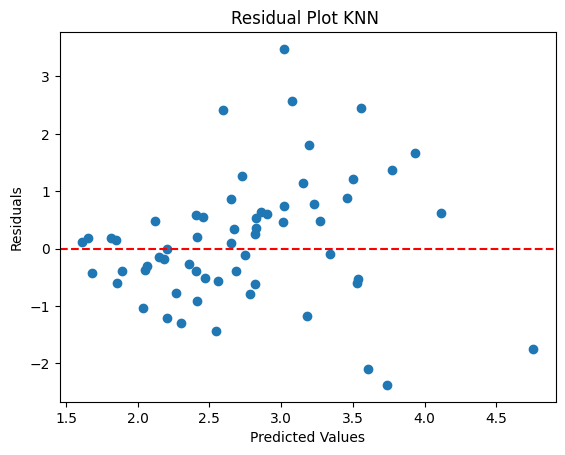

In [18]:
def residuals_plot(y_test, y_pred , name):
    residuals = y_test - y_pred
    print(np.mean(residuals))
    plt.scatter(y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot {name} ' )

    plt.show()


print('Residuals of Rideg_reg')
residuals_plot(y_test, y_pred_ridge , 'ridge')
print('')

print('Residuals of Lasso_reg')
residuals_plot(y_test, y_pred_lasso , 'Lasso')

print('Residuals of Tree_reg')
residuals_plot(y_test, y_pred_tree , 'Tree')

print('Residuals of Forest_reg')
residuals_plot(y_test, y_pred_forest , 'Forest')

print('Residuals of SVR_reg')
residuals_plot(y_test, y_pred_svr , 'SVR')

print('Residuals of KNN_reg')
residuals_plot(y_test, y_pred_knn , 'KNN')





Best Model is Lasso regression since it has highest R2 score


# Conclusion made for increase the Tip amount are follows as .
1. We notice that Sunday is busy day so to take more tip amount we increase more staff.
2. On Friday customers are less to increase customer some special discount should be given or some special type of food will serve .
3. Total bill means more tip so those customer have high bill give more better service quality  and send well trained staff members .

